In [1]:
# install package
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy

%matplotlib notebook

In [2]:
# define court size
width = 1800
height = 900

cp_trans = np.float32([[0,0], [0, height], [width, height], [width, 0]])

# カメラ1

<IPython.core.display.Javascript object>


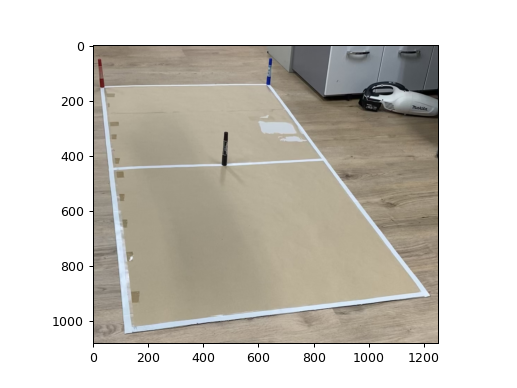

In [3]:
path = "original1.png"
origin_img = cv2.imread(path)

plt.imshow(cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB))

## コートの射影変換

In [4]:
cp_origin = []

# クリック関数（青→赤の順に一回り）
def click1(event, x, y, flags, params):
    global cp_origin
    if event == cv2.EVENT_LBUTTONDOWN:
        cp_origin.append([x,y])
        print(x, y)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cp_origin = []
        print("clear")

# クリック処理
cv2.imshow("window1", origin_img)
cv2.setMouseCallback("window1", click1)
cv2.waitKey(0)
cv2.destroyAllWindows()

638 140
25 148
114 1045
1220 908


In [5]:
cp_origin = np.float32(cp_origin)
# 射影変換行列
M1 = cv2.getPerspectiveTransform(cp_origin, cp_trans)
M1

array([[ 6.05849268e-02,  4.64232002e+00, -6.88577986e+02],
       [-1.72321173e+00,  1.30587139e+00,  9.16587091e+02],
       [-1.28037435e-04,  1.27369824e-03,  1.00000000e+00]])

## ペン(青, 赤)の射影先でカメラ位置を特定

In [6]:
#既知世界座標
real_b = [0, 0, 140]
real_r = [0, 900, 140]

# 射影先座標を初期化
image_b = [0, 0, 1]
image_r = [0, 0, 1]

# 仮変数
click = True

# クリック関数(ペン青→赤)
def click_pen(event, x, y, flags, params):
    global image_b, image_r, click
    if event == cv2.EVENT_LBUTTONDOWN:
        if click:
            image_b = [x, y, 1]
        else:
            image_r = [x, y, 1]
        click = not click
        print(x, y)

# クリック処理
cv2.imshow("window2", origin_img)
cv2.setMouseCallback("window2", click_pen)
cv2.waitKey(0)
cv2.destroyAllWindows()

643 49
22 51


In [9]:
# 射影変換行列の積をとって射影先を求める
shadow_b = np.dot(M1, image_b)
shadow_r = np.dot(M1, image_r)
# 第3要素で割ることで射影先のXY値が出る
shadow_b /= shadow_b[2]
shadow_r /= shadow_r[2]
# Z座標を0にしてそのまま配列を用いる
shadow_b[2] = 0
shadow_r[2] = 0

# 射影先から実物までの方向ベクトルを定義
dir_b = real_b - shadow_b
dir_r = real_r - shadow_r

In [10]:
# 方程式を解いてカメラ位置を求める(sympy)
# 数学的な記号を定義
t = sympy.Symbol("t") #青側の媒介変数
s = sympy.Symbol("s") #赤側の媒介変数

# 二乗距離
R = ((shadow_b[0] + t*dir_b[0]) - (shadow_r[0] + s*dir_r[0]))**2 + ((shadow_b[1] + t*dir_b[1]) - (shadow_r[1] + s*dir_r[1]))**2 + ((shadow_b[2] + t*dir_b[2]) - (shadow_r[2] + s*dir_r[2]))**2

# 偏微分
dR_dt = sympy.diff(R, t)
dR_ds = sympy.diff(R, s)

# 極値問題として解く（極大が存在しないため実質的に極小を求める）
ans = sympy.solve([dR_dt, dR_ds])
t_val = ans[t]
s_val = ans[s]

#カメラ位置に最も近い直線上の2点
b = np.float32([shadow_b[0] + t_val*dir_b[0], shadow_b[1] + t_val*dir_b[1], shadow_b[2] + t_val*dir_b[2]])
r = np.float32([shadow_r[0] + s_val*dir_r[0], shadow_r[1] + s_val*dir_r[1], shadow_r[2] + s_val*dir_r[2]])

#カメラ位置
camera1 = (b+r)/2
camera1

array([3126.0288 ,  959.46497, 1151.7134 ], dtype=float32)

## 目的点の射影先を求める

In [11]:
# 射影点の初期化
image_black = [0, 0, 1]

# クリック関数
def click_black1(event, x, y, flags, params):
    global image_black
    if event == cv2.EVENT_LBUTTONDOWN:
        image_black = [x, y, 1]
        print(x, y)

# クリック処理
cv2.imshow("window3", origin_img)
cv2.setMouseCallback("window3", click_black1)
cv2.waitKey(0)
cv2.destroyAllWindows()

481 317


In [12]:
# 射影変換行列の積をとって射影先を求める
shadow_black1 = np.dot(M1, image_black)
# 第3要素で割ることで射影先のXY値が出る
shadow_black1 /= shadow_black1[2]
# Z座標を0にしてそのまま配列を用いる
shadow_black1[2] = 0

# 方向ベクトルを定義
dir_black1 = camera1 - shadow_black1

# カメラ2

<IPython.core.display.Javascript object>


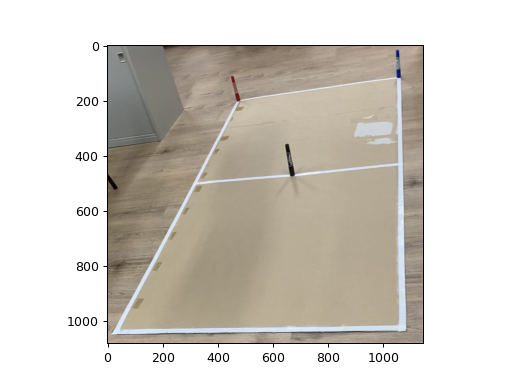

In [13]:
path = "original2.png"
origin_img = cv2.imread(path)

plt.imshow(cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB))

## コートの射影変換

In [14]:
cp_origin = []

# クリック関数（青→赤の順に一回り）
def click1(event, x, y, flags, params):
    global cp_origin
    if event == cv2.EVENT_LBUTTONDOWN:
        cp_origin.append([x,y])
        print(x, y)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cp_origin = []
        print("clear")

# クリック処理
cv2.imshow("window1", origin_img)
cv2.setMouseCallback("window1", click1)
cv2.waitKey(0)
cv2.destroyAllWindows()

1062 114
474 199
14 1050
1083 1035


In [17]:
cp_origin = np.float32(cp_origin)
# 射影変換行列
M2 = cv2.getPerspectiveTransform(cp_origin, cp_trans)

## ペン(青, 赤)の射影先でカメラ位置を特定

In [15]:
#既知世界座標
real_b = [0, 0, 140]
real_r = [0, 900, 140]

# 射影先座標を初期化
image_b = [0, 0, 1]
image_r = [0, 0, 1]

# 仮変数
click = True

# クリック関数(ペン青→赤)
def click_pen(event, x, y, flags, params):
    global image_b, image_r, click
    if event == cv2.EVENT_LBUTTONDOWN:
        if click:
            image_b = [x, y, 1]
        else:
            image_r = [x, y, 1]
        click = not click
        print(x, y)

# クリック処理
cv2.imshow("window2", origin_img)
cv2.setMouseCallback("window2", click_pen)
cv2.waitKey(0)
cv2.destroyAllWindows()

1051 19
452 114


In [18]:
# 射影変換行列の積をとって射影先を求める
shadow_b = np.dot(M2, image_b)
shadow_r = np.dot(M2, image_r)
# 第3要素で割ることで射影先のXY値が出る
shadow_b /= shadow_b[2]
shadow_r /= shadow_r[2]
# Z座標を0にしてそのまま配列を用いる
shadow_b[2] = 0
shadow_r[2] = 0

# 射影先から実物までの方向ベクトルを定義
dir_b = real_b - shadow_b
dir_r = real_r - shadow_r

In [19]:
# 方程式を解いてカメラ位置を求める(sympy)
# 数学的な記号を定義
t = sympy.Symbol("t") #青側の媒介変数
s = sympy.Symbol("s") #赤側の媒介変数

# 二乗距離
R = ((shadow_b[0] + t*dir_b[0]) - (shadow_r[0] + s*dir_r[0]))**2 + ((shadow_b[1] + t*dir_b[1]) - (shadow_r[1] + s*dir_r[1]))**2 + ((shadow_b[2] + t*dir_b[2]) - (shadow_r[2] + s*dir_r[2]))**2

# 偏微分
dR_dt = sympy.diff(R, t)
dR_ds = sympy.diff(R, s)

# 極値問題として解く（極大が存在しないため実質的に極小を求める）
ans = sympy.solve([dR_dt, dR_ds])
t_val = ans[t]
s_val = ans[s]

#カメラ位置の最近点
b = np.float32([shadow_b[0] + t_val*dir_b[0], shadow_b[1] + t_val*dir_b[1], shadow_b[2] + t_val*dir_b[2]])
r = np.float32([shadow_r[0] + s_val*dir_r[0], shadow_r[1] + s_val*dir_r[1], shadow_r[2] + s_val*dir_r[2]])

#カメラ位置
camera2 = (b+r)/2
camera2

array([2980.3992 ,  -99.99634, 1159.5731 ], dtype=float32)

## 目的点の射影先を求める

In [20]:
# 射影点の初期化
image_black = [0, 0, 1]

# クリック関数
def click_black1(event, x, y, flags, params):
    global image_black
    if event == cv2.EVENT_LBUTTONDOWN:
        image_black = [x, y, 1]
        print(x, y)

# クリック処理
cv2.imshow("window3", origin_img)
cv2.setMouseCallback("window3", click_black1)
cv2.waitKey(0)
cv2.destroyAllWindows()

651 361


In [24]:
# 射影変換行列の積をとって射影先を求める
shadow_black2 = np.dot(M2, image_black)
# 第3要素で割ることで射影先のXY値が出る
shadow_black2 /= shadow_black2[2]
# Z座標を0にしてそのまま配列を用いる
shadow_black2[2] = 0

# 方向ベクトルを定義
dir_black2 = camera2 - shadow_black2
dir_black2

array([629.84671769, 513.13718962,   0.        ])

# 画像2枚の情報から目的点の世界座標を求める

In [41]:
# 方程式を解いてカメラ位置を求める(sympy)

t = sympy.Symbol("t") #camera1 側の媒介変数
s = sympy.Symbol("s") #camera2 側の媒介変数
# 二乗距離
R = ((shadow_black1[0] + t*dir_black1[0]) - (shadow_black2[0] + s*dir_black2[0]))**2 + ((shadow_black1[1] + t*dir_black1[1]) - (shadow_black2[1] + s*dir_black2[1]))**2 + ((shadow_black1[2] + t*dir_black1[2]) - (shadow_black2[2] + s*dir_black2[2]))**2

# 偏微分
dR_dt = sympy.diff(R, t)
dR_ds = sympy.diff(R, s)

# 解く
ans = sympy.solve([dR_dt, dR_ds])
t_val = ans[t]
s_val = ans[s]

# 目標点の最近点
black1 = np.float32([shadow_black1[0] + t_val*dir_black1[0], shadow_black1[1] + t_val*dir_black1[1], shadow_black1[2] + t_val*dir_black1[2]])
black2 = np.float32([shadow_black2[0] + s_val*dir_black2[0], shadow_black2[1] + s_val*dir_black2[1], shadow_black2[2] + s_val*dir_black2[2]])

black = (black1 + black2)/2
black

array([901.4728 , 442.25446, 134.74414], dtype=float32)

<IPython.core.display.Javascript object>


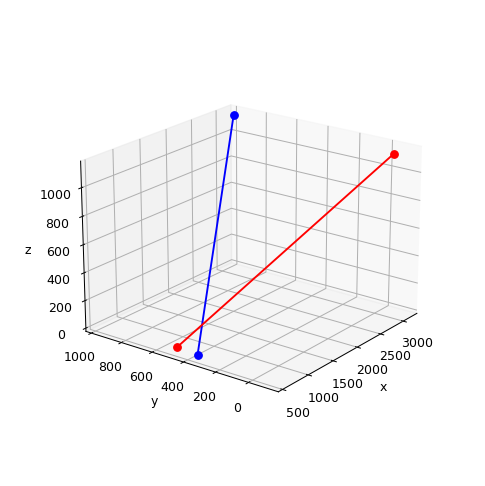

In [37]:
#3D Plot
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(projection="3d")
ax.plot([shadow_black1[0], camera1[0]], [shadow_black1[1], camera1[1]], [shadow_black1[2], camera1[2]], "o-", color="Blue")
ax.plot([shadow_black2[0], camera2[0]], [shadow_black2[1], camera2[1]], [shadow_black2[2], camera2[2]], "o-", color="Red")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [43]:
# 値の確認

print("shadow_black1", shadow_black1)
print("shadow_black2", shadow_black2)
print("black", black)
print("camera1", camera1)
print("camera2", camera2)

shadow_black1 [604.90560566 373.42857283   0.        ]
shadow_black2 [629.84671769 513.13718962   0.        ]
black [901.4728  442.25446 134.74414]
camera1 [3126.0288   959.46497 1151.7134 ]
camera2 [2980.3992   -99.99634 1159.5731 ]


In [42]:
# 手動(03_camera-position)の値
black_coord1 = [604, 371, 0] #shadow
black_coord2 = [626, 513, 0] #shadow
black_coord = [905.622231675388, 442.779944909853, 134.886724109919]

c1 = np.float32([649953353700/205821701, 201663639450/205821701, 236578391140/205821701])
c2 = np.float32([2202619713300/716160509, -72902447100/716160509, 840755052760/716160509])

print("c1", c1)
print("c2", c2)

c1 [3157.8467  979.7977 1149.4337]
c2 [3075.595   -101.79624 1173.9757 ]
